##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 텐서플로 2.0 시작하기: 초보자용

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />TensorFlow.org에서 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />깃허브(GitHub) 소스 보기</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: 이 문서는 텐서플로 커뮤니티에서 번역했습니다. 커뮤니티 번역 활동의 특성상 정확한 번역과 최신 내용을 반영하기 위해 노력함에도
불구하고 [공식 영문 문서](https://www.tensorflow.org/?hl=en)의 내용과 일치하지 않을 수 있습니다.
이 번역에 개선할 부분이 있다면
[tensorflow/docs-l10n](https://github.com/tensorflow/docs-l10n/) 깃헙 저장소로 풀 리퀘스트를 보내주시기 바랍니다.
문서 번역이나 리뷰에 참여하려면
[docs-ko@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ko)로
메일을 보내주시기 바랍니다.

이 문서는 [구글 코랩](https://colab.research.google.com/notebooks/welcome.ipynb)(Colaboratory) 노트북 파일입니다. 파이썬 프로그램을 브라우저에서 직접 실행할 수 있기 때문에 텐서플로를 배우고 사용하기 좋은 도구입니다:

1. 파이썬 런타임(runtime)에 연결하세요: 메뉴 막대의 오른쪽 상단에서 *CONNECT*를 선택하세요.
2. 노트북의 모든 코드 셀(cell)을 실행하세요: *Runtime* > *Run all*을 선택하세요.

더 많은 예제와 자세한 안내는 [텐서플로 튜토리얼](https://www.tensorflow.org/tutorials/)을 참고하세요.

먼저 프로그램에 텐서플로 라이브러리를 임포트합니다:

In [2]:
import tensorflow as tf

[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. 샘플 값을 정수에서 부동소수로 변환합니다:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만듭니다. 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [4]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델을 훈련하고 평가합니다:

In [5]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2945 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1433 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1079 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0757 - accuracy: 0.9761
313/313 - 1s - loss: 0.0760 - accuracy: 0.9772


[0.07599560916423798, 0.9771999716758728]

sparse_categorical_crossentropy vs categorical_crossentropy

In [6]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9126
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1488 - accuracy: 0.9557
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1099 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0924 - accuracy: 0.9709
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0772 - accuracy: 0.9757
313/313 - 1s - loss: 0.0711 - accuracy: 0.9775


[0.07111150771379471, 0.9775000214576721]

모델로 예측하기

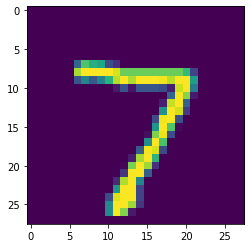

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])
img = tf.reshape(x_test[0], (1, 28, 28))

In [10]:
model.predict(img)

array([[1.39985179e-08, 9.41201839e-11, 2.11167553e-05, 7.02758989e-05,
        4.63684820e-11, 1.15449303e-08, 7.93289638e-15, 9.99908447e-01,
        5.16301490e-09, 1.18081594e-07]], dtype=float32)

모델의 저장 및 불러오기

In [11]:
model_path = "beginner.h5"
model.save(model_path)

In [12]:
restored_model = tf.keras.models.load_model(model_path)

restored_model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0711 - accuracy: 0.9775


[0.07111150771379471, 0.9775000214576721]

array([[2.6105651e-08, 1.6966927e-05, 2.6905583e-04, 2.1810292e-03,
        1.3590130e-02, 9.9973564e-05, 1.4075404e-07, 3.8567459e-04,
        2.9397040e-04, 9.8316306e-01]], dtype=float32)

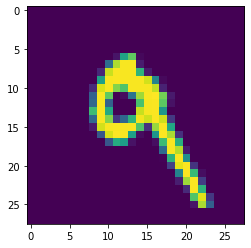

In [13]:
plt.imshow(x_test[7])
img = tf.reshape(x_test[7], (1, 28, 28))

restored_model.predict(img)

훈련된 이미지 분류기는 이 데이터셋에서 약 98%의 정확도를 달성합니다. 더 자세한 내용은 [TensorFlow 튜토리얼](https://www.tensorflow.org/tutorials/)을 참고하세요.